
<h1><center>Data Analytics</h1>
<h2><center>Homework 6</h2>
<h3><center>Name: 李權桓   &emsp;   ID:10546004</h3>

In [103]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
from matplotlib import image
import matplotlib.pyplot as plt
from scipy import stats
import os
import re
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import random
import io
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
%matplotlib inline


# Q1

## Q1a

### Loading packages

In [104]:
# define main PCA function

def myPCA(m , isCorrMx = False ) :
    m_bar = np.mean(m.T,axis=1)
    # print([float(i) for i in m_bar])
    Center_mat = m - [float(i) for i in m_bar]
    # print(Center_mat)

    if isCorrMx:
        V = np.corrcoef(Center_mat , rowvar =0)
        # V = np.corrcoef(m.T)
        
    else:
        V = np.cov(Center_mat , rowvar =0)
        # V = np.cov(m.T)
    eig_value, eig_vector = np.linalg.eig(V)
    result = eig_vector.T.dot(Center_mat.T).T
    return result , eig_value , eig_vector

In [105]:
# define main PCA function

def myFA(m , q=0 ) :
    
    # check if q=0 then will be col of m
    if q==0:
        q = m.shape[1]
        
    # start FA main func
    
    # find the center of x    
    m_bar = np.mean(m.T,axis=1)
    Center_mat = m - [float(i) for i in m_bar]

    # find the eigenV
    V = np.cov(Center_mat , rowvar =0) # must inclue rowvar or need to Transpose
    eig_value, eig_vector = np.linalg.eig(V)

    # make eigenValue to matrix
    eig_size = int(eig_value.shape[0])
    eigVal_m = np.zeros((eig_size,eig_size))
    np.fill_diagonal(eigVal_m,eig_value)

    # using q to update new eigenV
    q = 2
    update_eig_vector = eig_vector[:,:q]
    update_eig_value = eigVal_m[:q,:q]

    # find A, be careful sqrt might have nan 
    # because of negative eigenValue
    A_T = update_eig_vector@ np.sqrt(update_eig_value)
    A =A_T.T

    # find h_square, 
    # h_sq = A_T@A        # sometimes will fail because - value
    h_sq_m = update_eig_vector@update_eig_value@update_eig_vector.T
    h_sq = h_sq_m.diagonal()

    #find psi
    psi = V - h_sq_m

    # find F
    tmp_term = np.linalg.inv(psi)@A_T
    F=m@tmp_term@np.linalg.inv(A@tmp_term)
    
    l_var = []
    total_var = V.trace()
    for i in eig_value:
        l_var.append( np.round( i , 5))

    
    # return final results
    return A , F , h_sq , psi , l_var , total_var

### Import MPG data

In [106]:
# Read Text Files with Pandas

col_names = ['mpg','cylinders','displacement','horsepower',
            'weight','acceleration','year','origin','car_name']
# read text file into pandas DataFrame
df = pd.read_fwf("auto-mpg.data.txt",header=None,names = col_names)
# df = pd.DataFrame(df1.to_numpy() , columns=col_names)
# display DataFrame
df = df[~df.isin({'?'}).any(1)]
print(df)


      mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0    18.0          8         307.0      130.0  3504.0          12.0    70   
1    15.0          8         350.0      165.0  3693.0          11.5    70   
2    18.0          8         318.0      150.0  3436.0          11.0    70   
3    16.0          8         304.0      150.0  3433.0          12.0    70   
4    17.0          8         302.0      140.0  3449.0          10.5    70   
..    ...        ...           ...        ...     ...           ...   ...   
393  27.0          4         140.0      86.00  2790.0          15.6    82   
394  44.0          4          97.0      52.00  2130.0          24.6    82   
395  32.0          4         135.0      84.00  2295.0          11.6    82   
396  28.0          4         120.0      79.00  2625.0          18.6    82   
397  31.0          4         119.0      82.00  2720.0          19.4    82   

     origin                     car_name  
0         1  "chevrolet chevelle

In [107]:
m = df.loc[:,['cylinders','displacement','horsepower',
            'weight','acceleration','year','origin']].astype(float).to_numpy()
r = 2
A , F , h_sq , psi , l_var, total_var = myFA(m,r)


<AxesSubplot:xlabel='F1'>

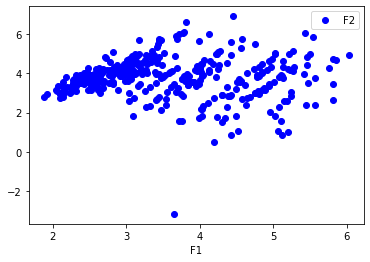

In [108]:
F_df = pd.DataFrame({'F1':F[:,0] , 'F2':F[:,1]})
F_df.plot(x='F1', y='F2', style='bo')


## Q1b

In [109]:
print('The Loading matrix: \n', A)
print('\nThe communality: \n', h_sq)
print()

for i in l_var[:r]:
    print('The variance contribution in factor analysis {:.3f} %'.format(i*100/total_var))

print('\nF:\n', F)

The Loading matrix: 
 [[ 1.53387275e+00  9.78370976e+01  3.33424798e+01  8.49389564e+02
  -1.15756458e+00 -1.14387985e+00 -4.71928262e-01]
 [-5.18452823e-01 -3.68000437e+01 -1.16047842e+01  4.69846449e+00
   1.35506622e+00  9.28064081e-01  1.26183723e-01]]

The communality: 
 [2.62155893e+00 1.09263409e+04 1.24639198e+03 7.21484707e+05
 3.17616022e+00 2.16976404e+00 2.38638617e-01]

The variance contribution in factor analysis 99.756 %
The variance contribution in factor analysis 0.206 %

F:
 [[ 4.11192037  2.46661631]
 [ 4.33852531  1.7392336 ]
 [ 4.03541399  1.83401095]
 [ 4.03006121  2.16589309]
 [ 4.04790296  2.33947012]
 [ 5.10235011  1.57569759]
 [ 5.12177598  0.83884027]
 [ 5.07095288  1.08667278]
 [ 5.20450481  0.99744431]
 [ 4.52715382  1.05987651]
 [ 4.19234853  0.49399371]
 [ 4.2395161   1.75681028]
 [ 4.42341554  0.84810421]
 [ 3.65109359 -3.15801158]
 [ 2.77112316  3.94161416]
 [ 3.31730531  3.3057878 ]
 [ 3.24908247  3.08304986]
 [ 3.03172491  2.57083566]
 [ 2.48791615  3

### The Comparison with hw5 q3b with using correlation matrix

In [110]:
def show_PCA_chart( eig_value):
    
    x = ['PC'+str(i) for i in range(1,len(eig_value)+1) ]
    total_Var = sum(eig_value)
    fig, ax1 = plt.subplots()
    color = 'tab:blue'
    ax1.set_xlabel('PCs')
    ax1.set_ylabel('Cumulative percentage(%)', color=color)
    ax1.bar(x, eig_value/total_Var*100, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    cum_Var = []
    tmp = 0
    for i in eig_value:
        tmp +=i
        cum_Var.append(tmp)
    
    color = 'tab:red'
    ax2.set_ylabel('Cumulative Variance', color=color)  # we already handled the x-label with ax1
    ax2.plot(x, cum_Var, '-*', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

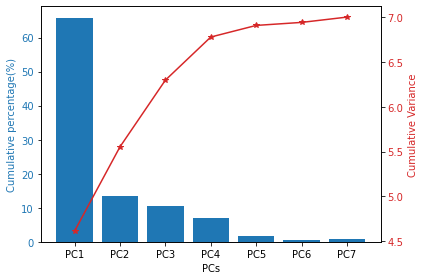

The variance contribution in PCA analysis 65.887 %
The variance contribution in PCA analysis 13.429 %


In [111]:
m = df.loc[:,['cylinders','displacement','horsepower',
            'weight','acceleration','year','origin']].astype(float).to_numpy()
result , eig_value , eig_vector = myPCA(m, isCorrMx = True)
show_PCA_chart( eig_value)

l_var = []
total_var = sum(eig_value)
for i in eig_value:
    l_var.append( np.round( i*100 /total_var , 5))

for i in l_var[:r]:
    print('The variance contribution in PCA analysis {:.3f} %'.format(i))

### The Comparison with hw5 q3b with using covariance matrix

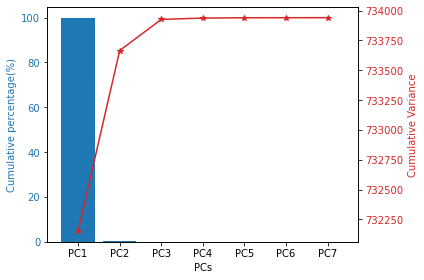

The variance contribution in PCA analysis 99.756 %
The variance contribution in PCA analysis 0.206 %


In [112]:
m = df.loc[:,['cylinders','displacement','horsepower',
            'weight','acceleration','year','origin']].astype(float).to_numpy()
result , eig_value , eig_vector = myPCA(m, isCorrMx = False)
show_PCA_chart( eig_value)

l_var = []
total_var = sum(eig_value)
for i in eig_value:
    l_var.append( np.round( i*100 /total_var , 5))

for i in l_var[:r]:
    print('The variance contribution in PCA analysis {:.3f} %'.format(i))

The first 2 PC already contribute all variance because variables correlations, 
ex `cylinders`,`displacement`,`horsepower` and `weight`.
The Factor Analysis when using the covariance looks the same with PCA.
Howevever,in PCA we know it is better use correlation in order to avoid the scale-varant issues.

# Q2

### loading ORL faces data

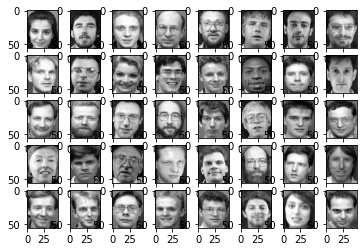

In [113]:
# get current working directory
cwd= os.getcwd()

# add the read directory to the path
rd = os.path.join(cwd)
zip_file = ZipFile('ORL Faces.zip')
dfs = {png_file.filename: image.imread(zip_file.open(png_file.filename))
       for png_file in zip_file.infolist()
       if png_file.filename.endswith('.png')}
png_df = pd.DataFrame([dfs])

# define gender by hand, each value for 10 pictures
col_name = list(png_df.columns)
fig, ax = plt.subplots(5, 8)
genders = [0,1,1,1,1,1,1,1,
           1,1,0,1,1,1,1,1,
           1,1,1,1,1,1,1,1,
           0,1,1,1,1,1,1,1,
           1,1,1,1,1,1,0,1]
dic = {}          
k = 0
# insert all gender to new row
for i in col_name:    
    match = re.search(r'\w*\s*\w*\/\d*\_1.png',i) 
    if match:
        #print(match.group(), k)
        plt.subplot(5,8,k+1)
        plt.imshow(png_df[i][0],cmap='gray')
        k = k +1
    dic[i]=[genders[k-1]]

In [114]:
# flatten all pics data 
df2 = pd.concat([png_df,pd.DataFrame(dic)]).reset_index(drop=True)
sample_df = df2.rename(index={0:'data',1:'gender'}).T
data_mat = np.array(np.ndarray.flatten(sample_df['data'][0]))
for i in range(1, len(sample_df)):
    data_mat = np.concatenate((data_mat,
         np.array(np.ndarray.flatten(sample_df['data'][i]))))
data_mat = data_mat.reshape(400,2576)
data_mat.shape

(400, 2576)

In [115]:
# do data transpose
m = data_mat.T
m.shape
A , F , h_sq , psi , l_var, total_var = myFA(m)


In [116]:
print('The total variance is ', total_var)
cum_Var = []
tmp = 0
for i in l_var:
    tmp +=i
    cum_Var.append(tmp)
np.where(cum_Var/total_var>.5)[0][0]
for i in range(5,10):
    index = np.where(cum_Var/total_var>i/10)[0][0] # return 1st index 
    output = cum_Var[index]
    print('The PC',i,': the cumulative variance is ', round(output, 2 ),'. The percentage is ', round(output/total_var*100,1),'%')

The total variance is  13.594727653440644
The PC 5 : the cumulative variance is  7.74 . The percentage is  57.0 %
The PC 6 : the cumulative variance is  8.36 . The percentage is  61.5 %
The PC 7 : the cumulative variance is  9.59 . The percentage is  70.5 %
The PC 8 : the cumulative variance is  10.91 . The percentage is  80.2 %
The PC 9 : the cumulative variance is  12.25 . The percentage is  90.1 %


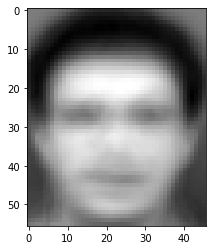

In [117]:
# extract 80% variance eigenvector. Choice first r component
q = 8
A , F , h_sq , psi , l_var, total_var = myFA(m,q)

# FA reverse transformation
pic_FA = F@A
PC1_pic = pic_FA.T[0]
plt.imshow(PC1_pic.reshape(56,46),cmap='gray')

# Q3

## Q3a

### Loading packages

In [118]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

### Import MPG data

In [119]:
# Read Text Files with Pandas

col_names = ['mpg','cylinders','displacement','horsepower',
            'weight','acceleration','year','origin','car_name']
# read text file into pandas DataFrame
df = pd.read_fwf("auto-mpg.data.txt",header=None,names = col_names)
# df = pd.DataFrame(df1.to_numpy() , columns=col_names)
# display DataFrame
df = df[~df.isin({'?'}).any(1)]
m = df.loc[:,['cylinders','displacement','horsepower',
            'weight','acceleration','year','origin']].astype(float).to_numpy()

/usr/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:93: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:325: RuntimeWarning: invalid value encountered in true_divide
  x_loadings = np.dot(x_scores, Xk) / np.dot(x_scores, x_scores)
/usr/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:334: RuntimeWarning: invalid value encountered in true_divide
  y_loadings = np.dot(x_scores, Yk) / np.dot(x_scores, x_scores)
/usr/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:93: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:325: RuntimeWarning: invalid value encountered in true_divide
  x_loadings = np.dot(x_scores, Xk) / np.dot(x_scores, x_scores)
/usr/lib/python3.10

Text(0.5, 1.0, 'MPG')

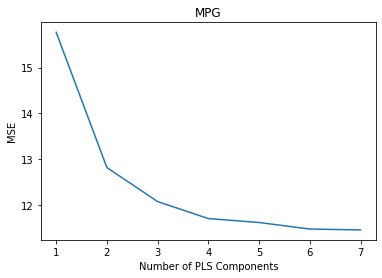

In [120]:
#define predictor and response variables
X = m
y = df["mpg"]
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, m.shape[1]+1):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('MPG')

In [121]:
m = df.loc[:,['cylinders','displacement','horsepower',
            'weight','acceleration','year','origin']].astype(float).to_numpy()
#define predictor and response variables
X = m
y = df["mpg"]
#split the dataset into training 300 and testing 92 sets
test_ratio = 92/392
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_ratio,random_state=0) 


#calculate RMSE
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

MSE = np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))
print('MSE: {:.3f}' .format(MSE))

MSE: 3.256


## Q3b

/usr/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:93: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/usr/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:93: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/usr/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:93: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)

Text(0.5, 1.0, 'MPG')

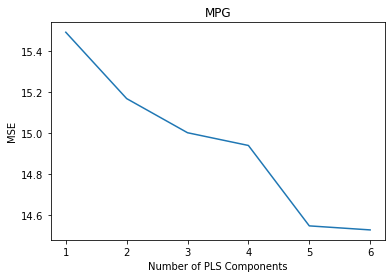

In [122]:
#define predictor and response variables
m = df.loc[:,['cylinders','displacement','horsepower',
            'weight','acceleration','origin']].astype(float).to_numpy()
X = m
y = df.loc[:,["mpg" ,'year'] ]
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, m.shape[1]+1):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('MPG')

In [123]:
#define predictor and response variables
m = df.loc[:,['cylinders','displacement','horsepower',
            'weight','acceleration','origin']].astype(float).to_numpy()
X = m
y = df.loc[:,["mpg" ,'year'] ]

#split the dataset into training 300 and testing 92 sets
test_ratio = 92/392
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_ratio,random_state=0) 


#calculate RMSE
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

MSE = np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))
print('MSE: {:.3f}' .format(MSE))

MSE: 3.709


- The q3a shows only `mpg` factor is responsed with few factors. 
- Whereas the q3b shows `mpg` and `year` will need more factors to minimize the MSE. 
- It might indicate `year` is more sigifigant response to certain factors. 